In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
user_df = pd.read_csv('takehome_users.csv', encoding='latin1')

In [3]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')

In [5]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
#Rename object_id to user_id so that we can merge later on
user_df = user_df.rename(columns={'object_id' : 'user_id'})

In [7]:
user_df.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [8]:
#Merge the two dataframes
df = pd.merge(user_df, engagement_df, on='user_id')

In [9]:
df.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [10]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


In [11]:
df.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
count,207917.000000,2.079170e+05,207917.000000,207917.000000,207917.000000,116887.000000,207917.0
mean,5913.314197,1.399439e+09,0.258137,0.154533,164.315895,5972.167555,1.0
std,3394.941674,8.294017e+06,0.437611,0.361460,121.165846,3247.095621,0.0
min,1.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,1.0
25%,3087.000000,1.401045e+09,0.000000,0.000000,60.000000,3269.000000,1.0
50%,5682.000000,1.401665e+09,0.000000,0.000000,145.000000,5972.000000,1.0
75%,8944.000000,1.401868e+09,1.000000,0.000000,260.000000,8513.000000,1.0
max,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.0


In [12]:
#Create new dataframe with user_id and time_stamp information 
joint_df = df[['user_id','time_stamp']].sort_values(by=['user_id','time_stamp'])

In [13]:
#Converting time_stamp to datetime format
joint_df.time_stamp = pd.to_datetime(joint_df.time_stamp)

In [14]:
#Create a count column to determine frequency of site visits
joint_df['counts'] = joint_df.groupby('user_id').transform('count')

In [15]:
#Pre-lim filter. Filter dataframe so that it only contains users with number of site visits above 3
joint_df = joint_df[joint_df['counts'] >= 3]
#joint_df.head()

In [16]:
#To use rolling window, need to set index to datetime 
joint_df['index'] = joint_df.time_stamp
joint_df = joint_df.set_index('index')

In [17]:
#Creat rolling 7 day window to check for user activity. Lambda function filters for those that meet the 3 day criteria.
joint_count = joint_df.groupby('user_id').rolling('7D').count()[lambda x: x.counts >= 3]
#joint_count.head()

In [18]:
#Drop duplicate column so that can reset index
joint_final = joint_count.drop(columns='user_id')

In [19]:
#Reset index
joint_final = joint_final.reset_index(0).reset_index(drop=True)
joint_final.head()

,user_id,counts
0,2,3.0
1,2,3.0
2,10,3.0
3,10,3.0
4,10,3.0


In [20]:
#No loger need index column. Dropping duplicates. 
#joint_final = joint_final.drop(columns= 'index')
joint_final = joint_final.drop_duplicates(subset= 'user_id')

In [21]:
#Merge two dataframes
final_df = df.merge(joint_final, on='user_id', how='left')
len(final_df)

207917

In [22]:
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,counts
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,3.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,3.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1,3.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1,3.0


In [23]:
#Create column to show user status using the counts column
final_df['user_status'] = [True if x >= 3 else False for x in final_df['counts']]

In [24]:
#Drop index column and counts column, as no longer needed
final_df = final_df.drop(columns= 'counts')

In [25]:
#Dropped duplicate users and sorted values based on user_id
final_df = final_df.drop_duplicates(subset= 'name').sort_values('user_id')
final = final_df

In [26]:
print(final.dtypes)

print(final.isnull().sum())

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
time_stamp                     object
visited                         int64
user_status                      bool
dtype: object
user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            3876
time_stamp                       0
visited                          0
user_status                      0
dtype: int64


In [27]:
#Now need to encode non-categorical columns and drop columns for further comparison
#Name and email dropped as user_id is more useful
#last_session_creation_time, time_stamp, and creation_time contain the same information
#visited only has 1 value
#invited_by_user_id has a high number of missing values, and can not confidentily fill

final = final.drop(columns=['name','email','visited', 'last_session_creation_time', 'time_stamp', 'invited_by_user_id'])

#print(final.dtypes)

final.creation_time = LabelEncoder().fit_transform(final.creation_time)
final.creation_source = LabelEncoder().fit_transform(final.creation_source)
final.user_status = LabelEncoder().fit_transform(final.user_status)

In [28]:
final.user_status.value_counts()

0    6918
1    1535
Name: user_status, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_status', ylabel='count'>

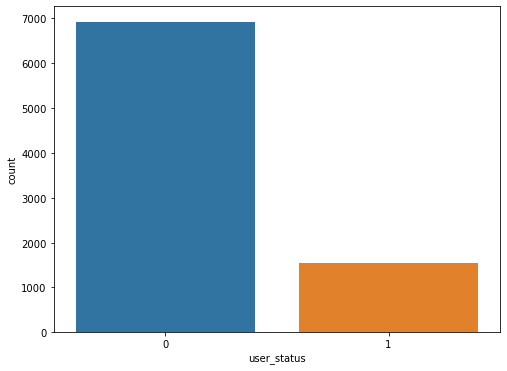

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(final['user_status'])

Correlation Between Various Features


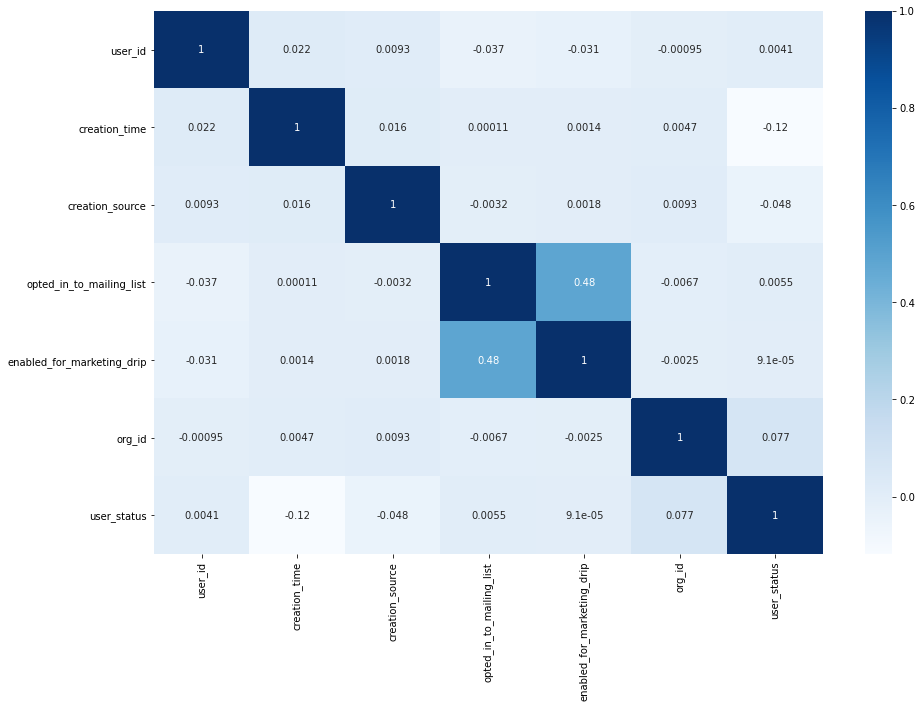

In [30]:
#Visualize correlation between features

print('Correlation Between Various Features')
plt.figure(figsize=(15,10))
p = sns.heatmap(final.corr(), annot=True,cmap ='Blues')

<AxesSubplot:xlabel='creation_source', ylabel='count'>

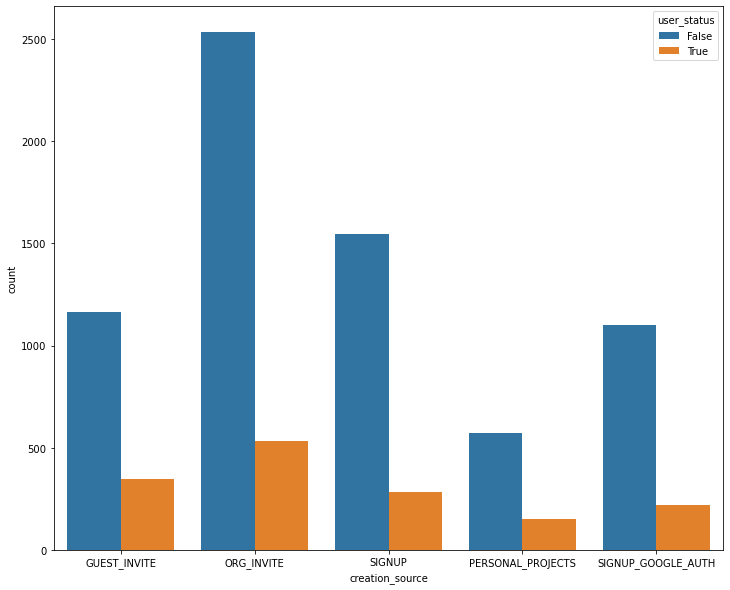

In [31]:
plt.figure(figsize=(12,10))
sns.countplot(x='creation_source', hue='user_status', data=final_df)

In [32]:
#Select and scale
X = final.drop(columns='user_status') #Dropping user status, as it is our target variable
y = final.user_status

X = StandardScaler().fit_transform(X)

#Split into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Create model
model = LinearRegression()

#Fit the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [33]:
predictions = model.predict(x_test)
print(predictions)

[0.2608245  0.08621221 0.17982126 ... 0.13681063 0.22618877 0.12476892]


In [34]:
'''Following is from sklearn Linear Regression Example'''
# The coefficients
print('Coefficients:', model.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Coefficients: [-0.00020111 -0.04547623 -0.02046696  0.00550907 -0.00258247  0.03137421]
Mean squared error: 0.14
Coefficient of determination: 0.02


In [35]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results

,Actual,Predicted
123816,0,0.260824
134159,0,0.086212
13904,1,0.179821
84952,0,0.255040
179094,0,0.181640
...,...,...
106000,1,0.126220
64989,0,0.281499
193048,1,0.136811
108190,0,0.226189


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [37]:
#Select and scale
Xl = final.drop(columns='user_status') #Dropping user status, as it is our target variable
yl = final.user_status

Xl = StandardScaler().fit_transform(X)

#Split into test and train
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.40, random_state=42)

#Create model
lmodel = LogisticRegression()

#Fit the model on the training data
lmodel.fit(xl_train, yl_train)

LogisticRegression()

In [38]:
lpredictions = lmodel.predict(xl_test)
print(lpredictions)

[0 0 0 ... 0 0 0]


In [39]:
#Print the accuracy score and classification report from the testing data
print(accuracy_score(lmodel.predict(xl_test), yl_test))

print(classification_report(yl_test, lpredictions))

0.8255470136014192
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2792
           1       0.00      0.00      0.00       590

    accuracy                           0.83      3382
   macro avg       0.41      0.50      0.45      3382
weighted avg       0.68      0.83      0.75      3382



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
